#               Analyzing The Impact of Social Media Marketing on Sales of 
#                        “Yamaha Music Waves”- Montage 8 Synthesizer.

# Importing Libraries and Data File

In [5]:
import numpy as np

# Data processing
import pandas as pd

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Train and Test split
from sklearn.model_selection import train_test_split

#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

# Dataset Analysis

In [7]:
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1]) 

Number of rows is =  400  
Number of columns is =  5


In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df.head().style.background_gradient(cmap='twilight')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


###### Only Gender column is categorical.

In [10]:
df.describe().T.style.background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


In [11]:
df.duplicated().sum()

0

# Missing Value Analysis

In [12]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

###### There is no missing value in the dataset.

# Heat Map

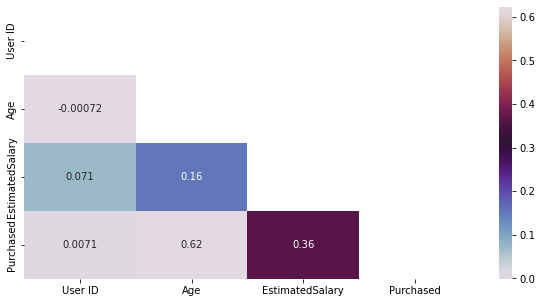

In [13]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='twilight');

In [14]:
correlation = pd.DataFrame(df.corr().Purchased)
correlation

,Purchased
User ID,0.007120
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


In [15]:
df.drop('User ID', axis = 1, inplace=True)

###### The User ID column has no significance in determining the target, so it can be dropped.

# Analysis and Visualization of Target

In [16]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

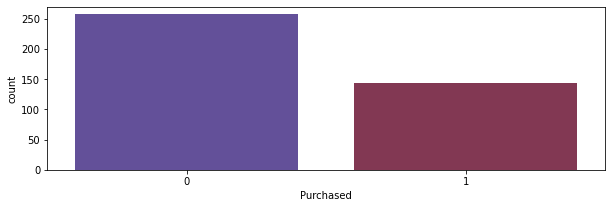

In [17]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Purchased",data=df, palette="twilight")
plt.show()

###### From above visualization it is clear that number customers purchased from social networking advertisment is far less that total customers viewed the advertisement.

# Visualization and statistical analysis of Target with respect to Gender

<Figure size 720x216 with 0 Axes>

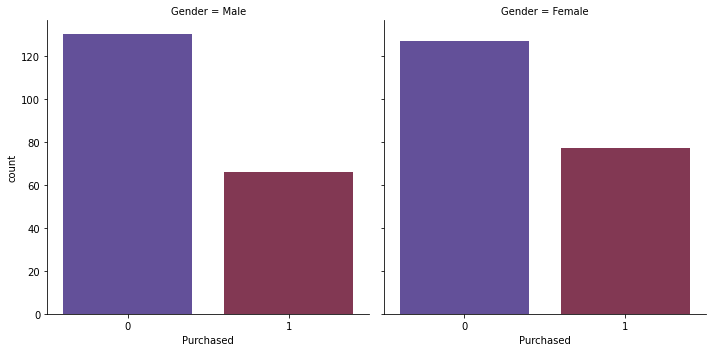

In [18]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette="twilight");
plt.show()

In [19]:
pd.crosstab(df.Gender,df.Purchased,normalize = "index" ).style.background_gradient(cmap='flare')

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


###### 37.74% of female customers have purchased a product from social networking advertisment where as only 33.67% of male customers purchased from social networking advertisment.

# Distribution and Visualisation of Age and Estimated Salary

<AxesSubplot:xlabel='Age', ylabel='Count'>

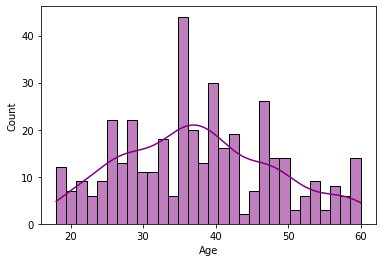

In [20]:
sns.histplot(df['Age'],kde=True,color='purple',bins=30)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

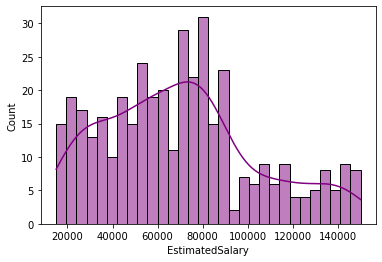

In [21]:
sns.histplot(df['EstimatedSalary'],kde=True,color='purple',bins=30)

###### Skew is towards age group 35-38 and estimated salary skew is towards 70k to 90k

# Pair Plot of Age and Estimated Salary with Target

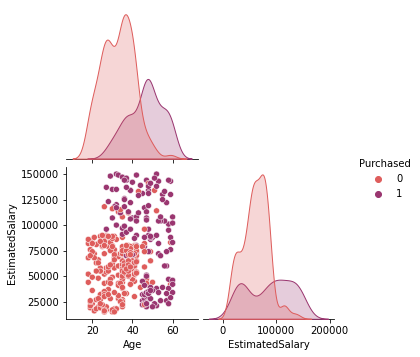

In [22]:
sns.pairplot(df , hue = 'Purchased',palette='flare',corner=True )

# Scatter Plot of Age and Estimated Salary with respect to Target 

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

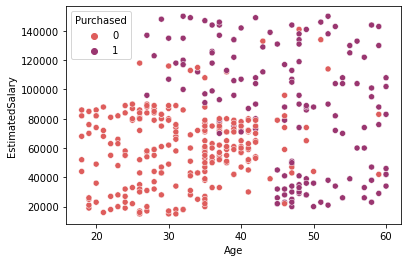

In [23]:
sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased', palette ='flare')

###### From pair plot and scatter plot it is clear that if scaling is not done, Estimated Salary will dominate Age, which will result in a biased model. Feature Scaling will be done after splitting the model into training and test set.

# Encoding Categorical Data

In [24]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True)

In [25]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Splitting Dataset

In [26]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [28]:
cols = X_train.columns

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

# K Nearest Neighbor(KNN)

In [30]:
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = classifierKNN.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Evalution of KNN Classifier
Confusion Matrix

K Nearest Neighbour (KNN) is a supervised learning algorithm used for classification or regression problems. It is more efficient for classification problems and here the algorithm uses K nearest points to determine the classification of a data point. KNN is used to classify a data point based on the known classification of other data points.

KNN works consider that similar things exist in close proximity or distance and there is no need to build a model, as it tunes several parameters, or makes additional assumptions. KNN is versatile but gets slower as the features increase.

In [32]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[64  4]
 [ 3 29]]


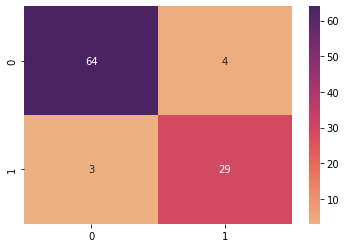

In [34]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='flare')
plt.show()

###### Out of 100, only 7 is wrongly predicted

# Classification Report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



###### Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%.

# Choosing a K Value

In KNN Choice of k is very critical. A small value of k means that noise will have a higher influence on the result. A large value makes it computationally expensive and is contradictory to the basic idea behind KNN, that close points might have similar densities or classes.The default parameter for the number of neighbors k is 5.

In [38]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

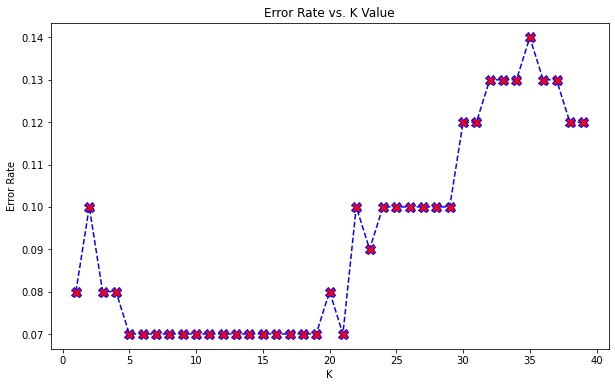

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###### From the plot it is clear from K =5 to K =18 the error rate is lowest and K= 35 error rate is maximum.

WITH K=10


[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100





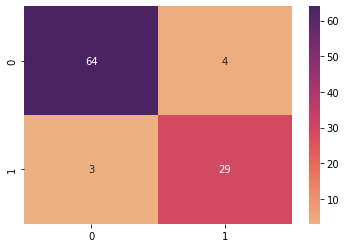

In [41]:
knn1 = KNeighborsClassifier(n_neighbors=10)

knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred1))
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='d', cmap='flare')
print('\n')
print(classification_report(y_test,pred1))
print('\n')

K =5 and K =10 is having the same accuracy, precision, recall, and F1- score. It is the same predicted from the plot of error rate vs K value that K with 5 to 10 will have same result.

WITH K=35


[[65  3]
 [11 21]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.88      0.66      0.75        32

    accuracy                           0.86       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.86      0.86      0.85       100





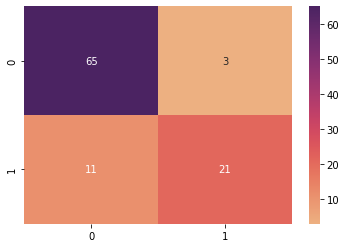

In [44]:
knn2 = KNeighborsClassifier(n_neighbors=35)

knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred2))
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, fmt='d', cmap='flare')
print('\n')
print(classification_report(y_test,pred2))
print('\n')

With K = 35, out of 100, 14 predictions are wrong and accuracy decreased to 86%. Also recall from purchased category has gone down to 66%. It clearly states if the K value is large, KNN does not perform efficiently.

# Support Vector Machine (SVM) with Linear Kernel

Support Vector Machine is a set of supervised learning methods and is used for classification, regression, and outliers detection. The main advantage of SVM is it is effective in high dimensional space even when the number of samples is less than the number of dimensions. But in cases where dimensions are more than the number of samples, overfitting is to be avoided.

The main goal of the SVM algorithm is to create the best line or decision boundary which is the hyperplane that can segregate n-dimensional space into classes so that it can put the new data point in the correct category in the future.

Unlike other classifiers which pay attention to all of the points, Support vector machines focus only on the points that are the most difficult to classify.



In [45]:
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)

SVC(kernel='linear')

Default value of gamma is scale and default value of C parameter is 1.

In [46]:
classifierLin.gamma

'scale'

In [47]:
classifierLin.C

1.0

In [48]:
y_pred_svc = classifierLin.predict(X_test)

In [49]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# Evalution of SVM with Linear Kernel

#### Confusion Matrix

In [50]:
cm2 = confusion_matrix(y_test, y_pred_svc)
print(cm2)

[[66  2]
 [ 9 23]]


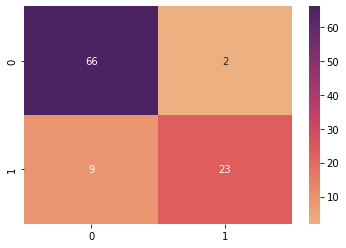

In [52]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='flare')
plt.show()

###### Out of 100, 11 are wrongly predicted.

# Classification Report

In [54]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100



###### Accuracy is 89% but recall for purchased is only 72%.

# SVM with Kernel Radial Basis Function

In [55]:
classifierrbf = SVC(kernel = 'rbf')
classifierrbf.fit(X_train, y_train)

SVC()

In [56]:
classifierrbf.C

1.0

In [57]:
classifierrbf.gamma

'scale'

In [58]:
y_pred_rbf = classifierrbf.predict(X_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Evalution of SVM with RBF Kernel

In [60]:
cm3 = confusion_matrix(y_test, y_pred_rbf)
print(cm3)

[[64  4]
 [ 3 29]]


###### Out of 100, only 7 is wrongly predicted

In [61]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



###### Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%

HyperParameter Tuning : Hyperparameter optimization is a method of choosing a set of optimal hyperparameters for a learning algorithm. The machine learning model can have different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. The main difference between parameters and hyperparameters are, parameters are learned automatically where as hyperparameters value are set manually.

The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can be configured to the model for best performance.
To get well-performing hyperparameters there different search approarch like Grid Search, Random Search, Bayesian optimization, Gradient-based optimization, Evolutionary optimization, Population-based.


# GridSearch
Grid search is kind of tuning process, which selects the best parameters for an algorithm to optimize its performance but it take quite long time to run. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. GridSearchCV implements a “fit” and a “score” method.

When training an SVM, two parameters must be considered:

C

gamma

By using Grid search best optimal value for C and gamma as well as best Kernel for SVM can be found out.

In [63]:
g =GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})

In [64]:
g.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

In [65]:
g.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

###### The Grid search gives a combination of values which have the highest accuracy among all the values.

In [66]:
g.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

###### Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.

In [67]:
g.best_estimator_

SVC(C=1, gamma=1)

In [68]:
grid_pred = g.predict(X_test)

# Evalution with Grid Search
Confusion Matrix

In [69]:
print(confusion_matrix(y_test,grid_pred))

[[64  4]
 [ 3 29]]


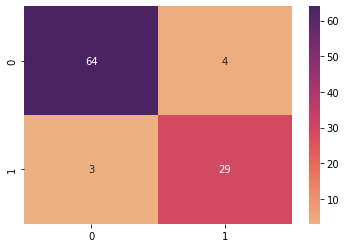

In [70]:
sns.heatmap(confusion_matrix(y_test,grid_pred), annot=True, fmt='d', cmap='flare')
plt.show()

###### Out of 100, only 7 is wrongly predicted

# Classification Report

In [71]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



###### Overall Accuracy is 93% and Precision, Recall and F1-score for predicting not purchased category is above 94% and for purchased category is close to 90%

# Decision Tree Visualization

In [85]:
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset.head()
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

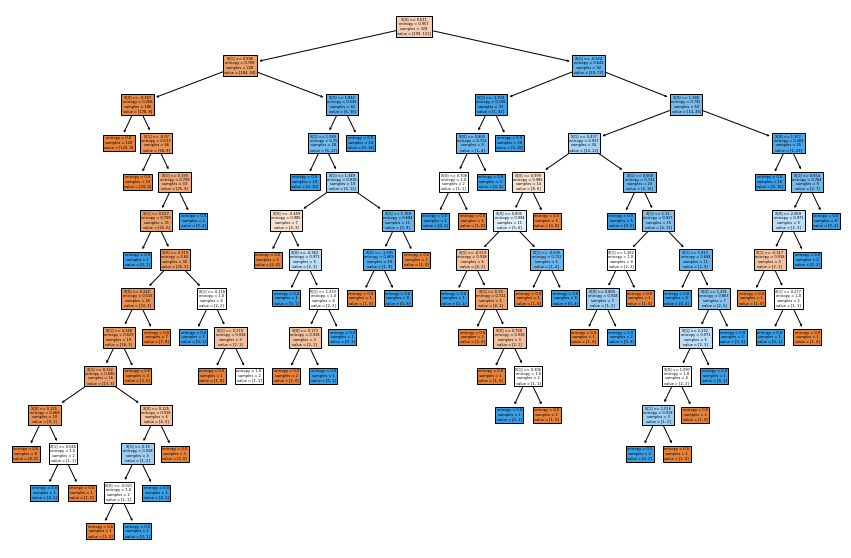

In [87]:
#Model Evaluation
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()
#We can see that our tree has many nodes.
#So Splitting has taken place many times.
#The problem with this is that we may have good accuracy 
#on our training Dataset because the model learns by heart the values.
#We we try to predict the result for unseen data (test) data 
#there is possibility of our accuracy reducing

In [88]:
#Accuracy Score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = clf.predict(X_test)
y_train = clf.predict(X_train)
from sklearn.metrics import accuracy_score 
print("Train Accuracy is:",accuracy_score(y_train,y_train))
print("Test Accuracy is:",accuracy_score(y_test,y_pred))

Train Accuracy is: 1.0
Test Accuracy is: 0.925


###### We can see that we have 100% accuracy for our training test and around 92.5% accuracy for our test set.This shows that our training model set is overfitting.

In [89]:
#Classification Report
cr =classification_report(y_test,y_pred)
print("Classification Report")
print(cr)
#We have quite good value of Accuracy and F1 Score.

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



# Decision Tree Pruning

In the desision tree algorithm there are parameters like min_samples_leaf and max_depth to prevent the tree from overfitting.We can use another method cost complexity pruning to control the size of our trees.The complexity of tree is controlled by a parameter ccp_alpha.Greater value of ccp_alpha meanse more number of nodes in the tree are pruned.

In [90]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2789340883820818


# Training and Test Accurac Vs Alpha

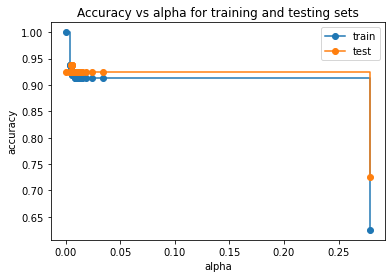

In [91]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

###### From the above cure we can see that we can get train and test set accuracy when we select the alpha value between 0.02 to 0.27.So I am selecting a value of 0.12 for alpha while creating the decision tree model.

In [92]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.12)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.925

# Pruned Decision Tree

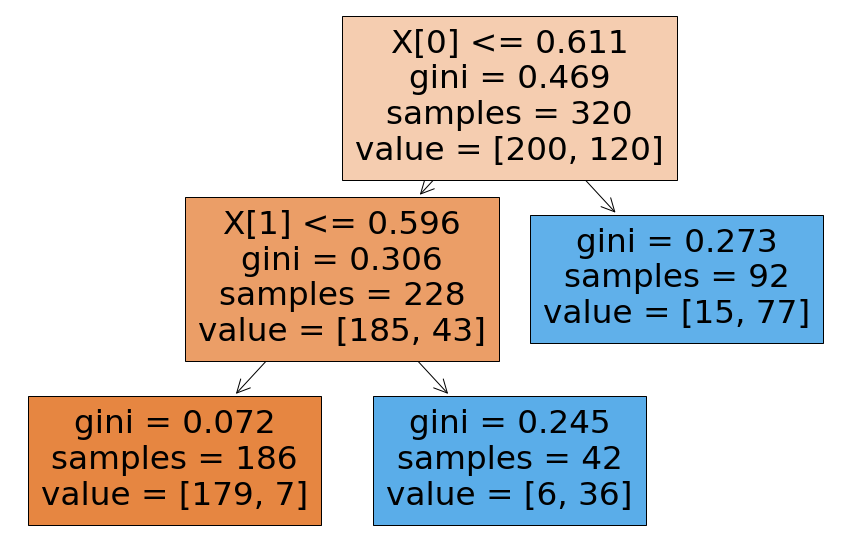

In [93]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

###### So by using alpha value as 0.12 we have been able to prune our decision tree to a large extent.This help in time reduction for training and also prevents overfitting of our models

In this data set we had Age,Salary,Sex and purchase decision.We have made use of Age,Salary to predict whether a customer will make a purchase decision.

2.We have used feature scaling and then built a decision tree model to make purchase prediction.

3.Based on the model evaluation we could conclude that our model had over fitting on the training set.

4.We used Decision Tree Pruning technique to optimise over model.This reduced the size of our decision tree by considering an optimum value of alpha.

In [73]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
#importing dataset
ds = pd.read_csv('Social_Network_Ads.csv')
ds.head()
#checking for null values
ds.isnull().any()
#assigning independent and dependent variables
x = ds.iloc[:,2:-1].values
y = ds.iloc[:,-1].values
#splitting data in testing and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
#applying feature scaling
#note that feature scaling is not necessary  but applying it may increase accuracy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [77]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

confusion matrix:
 [[57  1]
 [ 5 17]]
accuracy score =  0.925


In [80]:
#KNN
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#SUPPORT VECTOR MACHINE
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#KERNEL SUPPORT VECTOR MACHINE
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[55  3]
 [ 1 21]]
accuracy score =  0.95
confusion matrix:
 [[57  1]
 [ 6 16]]
accuracy score =  0.9125
confusion matrix:
 [[55  3]
 [ 1 21]]
accuracy score =  0.95


# Naive Bayes

In [81]:
#training model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[55  3]
 [ 4 18]]
accuracy score =  0.9125


# Decision Tree Classifier

In [82]:
#training model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[53  5]
 [ 3 19]]
accuracy score =  0.9


# Random Forest Classifier

In [83]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[55  3]
 [ 2 20]]
accuracy score =  0.9375


<BarContainer object of 7 artists>

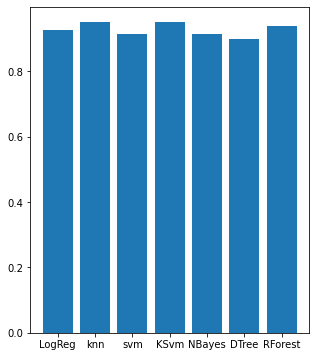

In [84]:
#comparing accuracies
plt.figure(figsize= (5,6))
ac = [lra,knna,sva,sva2,nba,dta,rfa]
name = ['LogReg','knn','svm','KSvm','NBayes','DTree', 'RForest']
plt.bar(name,ac)

# Conclusion

###### Number customers purchased through social networking advertisment is far less that total customers viewed the advertisement.
######  37.74% of female customers have purchased a product through social networking advertisment where as only 33.67% of male customers purchased through social networking advertisment.
######  For KNN, K =5 to K =18 have least error rate and K= 35 has maximum error rate.
######  Best Parameter for SVM is Kernel rbf with gamma =1 and C =1.
######  KNN with least error rate and SVM with best optimisation parameter have overall:
######  Accuracy 93%
######  Precision, Recall and F1-score for predicting not purchased category is above 94%
######  Precision, Recall and F1-score for predicting purchased category is close to 90%.